In [6]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
% matplotlib inline

In [7]:
nc_filename=sorted(glob.glob('S*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

found *.nc file: 
['S_W2002-2008.nc']


In [8]:
lon=ptrc.variables['nav_lon'][:,:]
lat=ptrc.variables['nav_lat'][:,:]
dep = ptrc.variables['deptht'][:]


tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy=tmask.variables['mbathy'][0,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

In [12]:
monthnum=12*7-1

(83,)
0
1
2
0
1
2


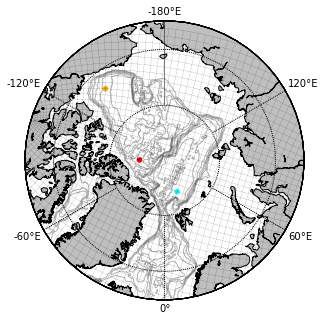

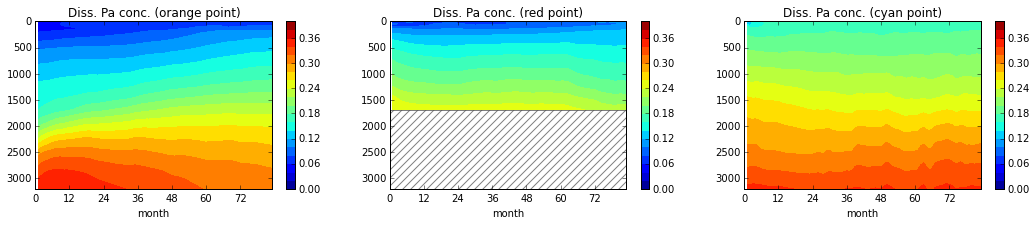

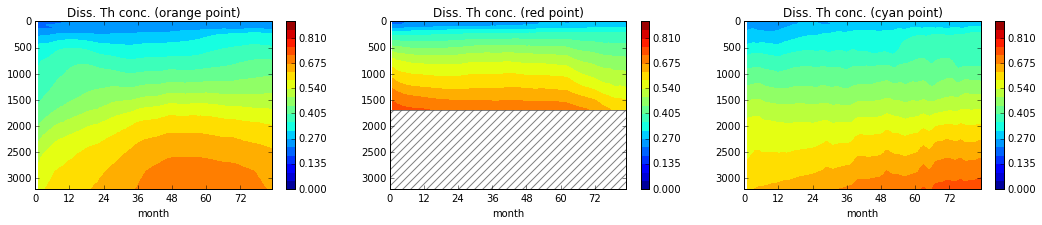

In [14]:
x=np.array([700-400,590-400,560-400])#/2
y=np.array([180,264,340])#/2
c=['orange','red','cyan']


time=np.empty(monthnum)
print time.shape
for i in range (len(time)):
    time[i]=i+1
    
    
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=20)
cs=m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)
#plt.clabel(cs, fontsize=10, inline=1,fmt = '%1.0f')


    
fig = plt.figure(figsize=(18,3))
for i in range (len(y)):
    print i
    ax = fig.add_subplot(1,3,i+1)
    data=ptrc.variables['TR_7'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0, 0.4, 21))
    plt.colorbar()
    plt.title('Diss. Pa conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(1,len(time))
    plt.xlabel('month')
    ax.invert_yaxis()
    plt.xticks(np.arange(0, len(time)+1, 12))

 
    
fig = plt.figure(figsize=(18,3))
for i in range (len(y)):
    print i
    ax = fig.add_subplot(1,3,i+1)
    data=ptrc.variables['TR_8'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0,0.9, 21))
    plt.colorbar()
    plt.title('Diss. Th conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlabel('month')
    ax.invert_yaxis() 
    plt.xticks(np.arange(0, len(time)+1, 12))

plt.show()

In [15]:
# find cross Canada profile (1)

x=np.array([720-400])
y=np.array([160])
a_=np.zeros([190,1])
b_=np.zeros([190,1])

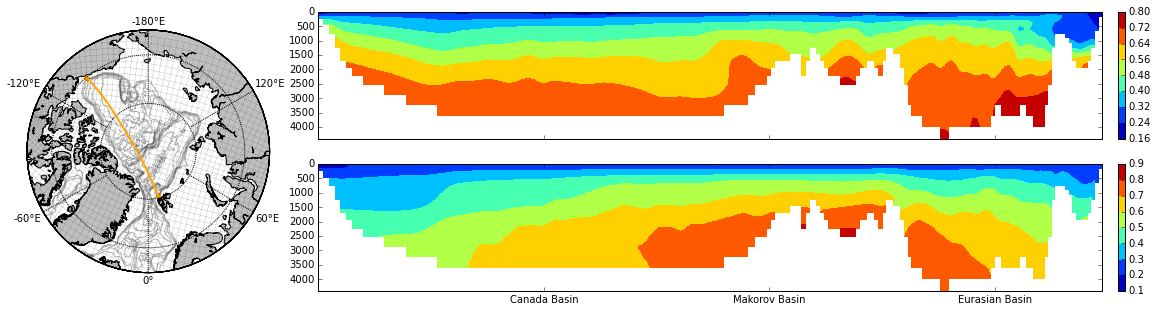

In [16]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(2, 4)

# 1st plot
ax = fig.add_subplot(gs[0:2,0])

m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
# find cross Canada profile (2)
for j in range (len (y)):
    a=[]
    b=[]
    for i in range (190):
        a.append(x_lon[x[j]-i,y[j]+i])
        b.append(y_lat[x[j]-i,y[j]+i])
    a_[:,j]=a
    b_[:,j]=b
    m.plot(a_[:,j],b_[:,j],color=c[j],linewidth=2)
m.scatter(a_[0],b_[0],color=c,s=20)
m.scatter(a_[-1],b_[-1],color=c,s=20)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)


#Final field
ax = fig.add_subplot(gs[0,1:4])
data_=np.zeros([50,190,len (y)])
for j in range (len (y)):
    for i in range (190):
        data_[:,i,j]=ptrc.variables['TR_8'][-1,:,x[j]-i,y[j]+i]
data_=np.ma.masked_where(data_<=0,data_)
plt.contourf(a_[:,j],dep[:-3],data_[:-3,:,0]);plt.colorbar(fraction=0.03,pad=0.02)
ax.invert_yaxis()
plt.xticks(np.arange(a_[:,0].min(), a_[:,0].max(),480000))
ax.get_xaxis().set_ticklabels([])

#initial field
ax = fig.add_subplot(gs[1,1:4])
data_=np.zeros([50,190,len (y)])
for j in range (len (y)):
    for i in range (190):
        data_[:,i,j]=ptrc.variables['TR_8'][1,:,x[j]-i,y[j]+i]
data_=np.ma.masked_where(data_<=0,data_)
plt.contourf(a_[:,j],dep[:-3],data_[:-3,:,0]);plt.colorbar(fraction=0.03,pad=0.02)
ax.invert_yaxis()
#change label for the bottom plot
plt.xticks(np.arange(a_[:,0].min(), a_[:,0].max(),480000))
a=ax.get_xticks().tolist()
a[0]='';a[1]='Canada Basin';a[2]='Makorov Basin';a[3]='Eurasian Basin'
ax.set_xticklabels(a)

plt.show()

In [17]:
data_[:,:,0].shape,a_[:,j].shape,dep.shape

((50, 190), (190,), (50,))

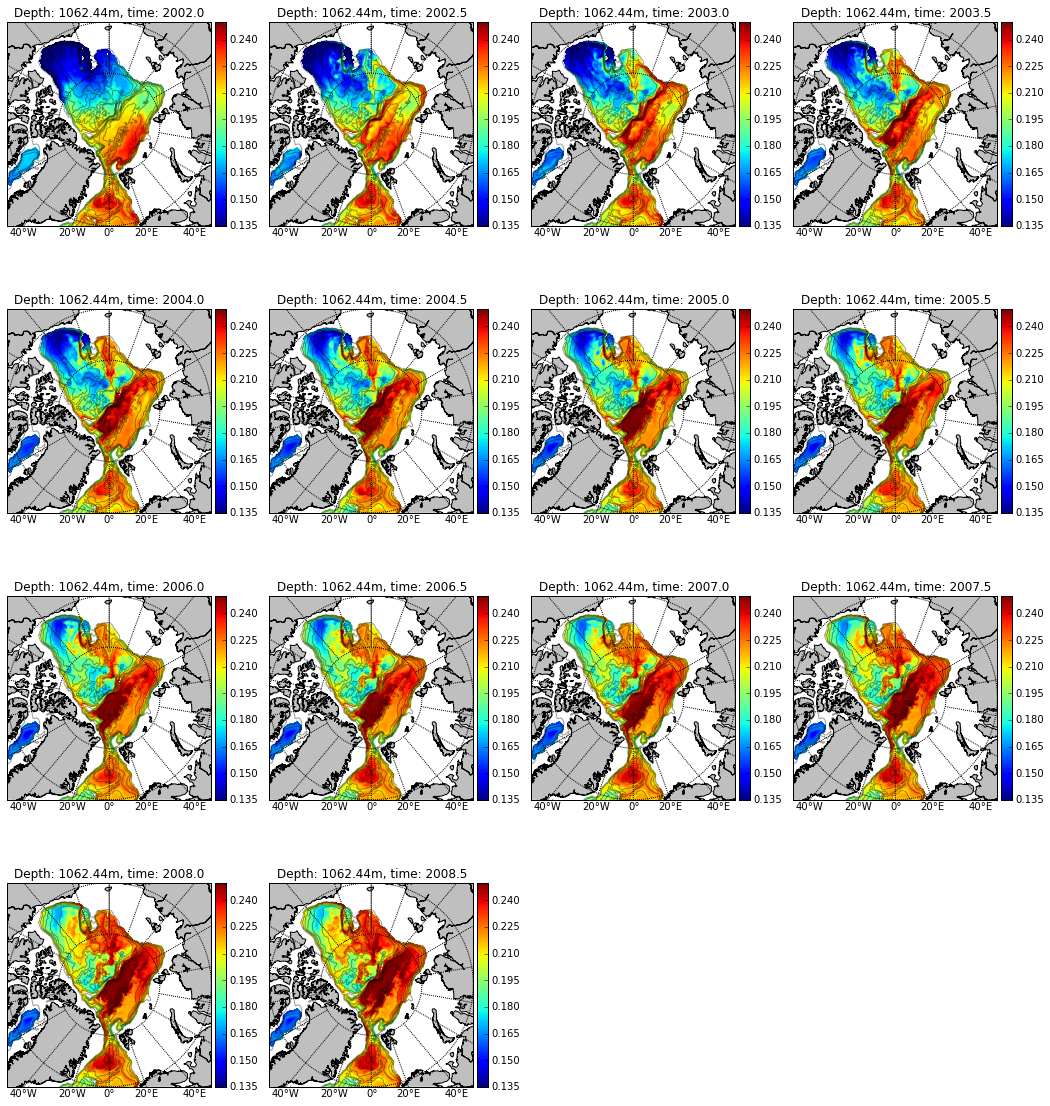

In [41]:
# tracer field at the current time step (TR_7)

layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,6):
    time =i
    data =ptrc.variables['TR_7'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0.135,vmax=0.25);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12.))

plt.show()

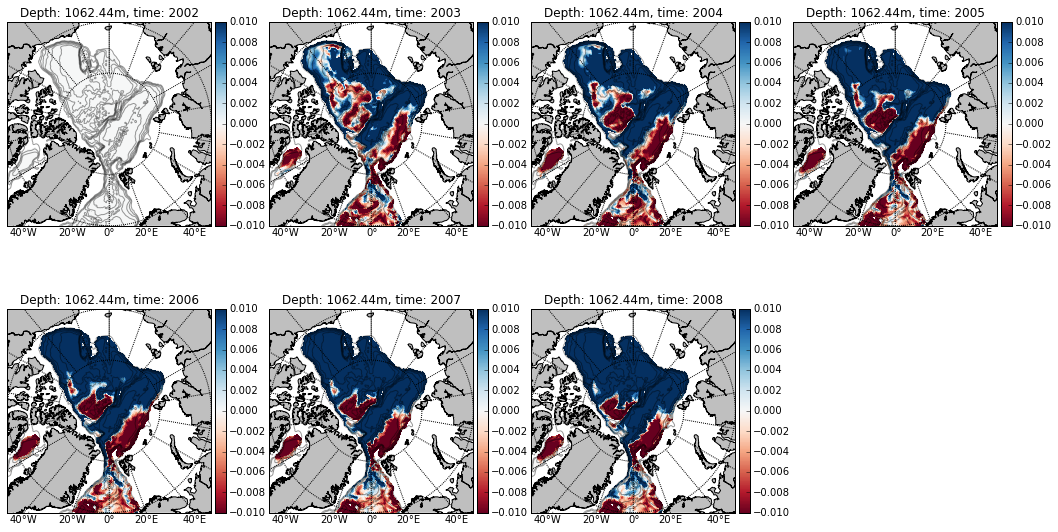

In [19]:
# difference between the current time step and initial time step

layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_7'][time,:,:,:]-ptrc.variables['TR_7'][0,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmin=-0.01,vmax=0.01);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

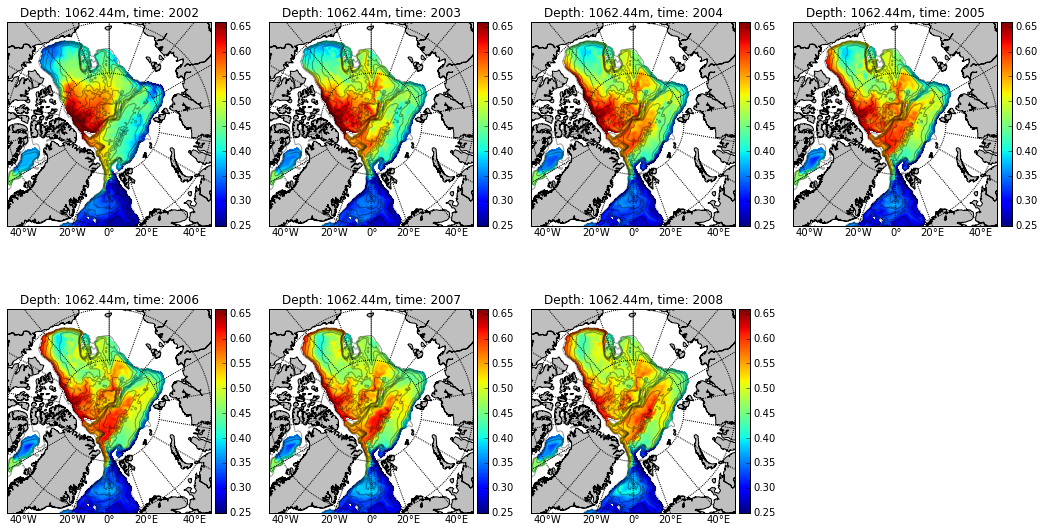

In [20]:
# tracer field at the current time step (TR_8)

layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_8'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0.25,vmax=0.66);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

* Ice on the top of Makorov Basin barely changed. Therefore, the decrease is due to scavenging process.
http://nbviewer.jupyter.org/urls/bitbucket.org/ccar-modeling/analysis/raw/tip/Cindy%20Yu/para_MinIce/WhichIsTheBetterWay_230Th-Copy1.ipynb

* However the increase in CB and NB is due to high ice concentration.

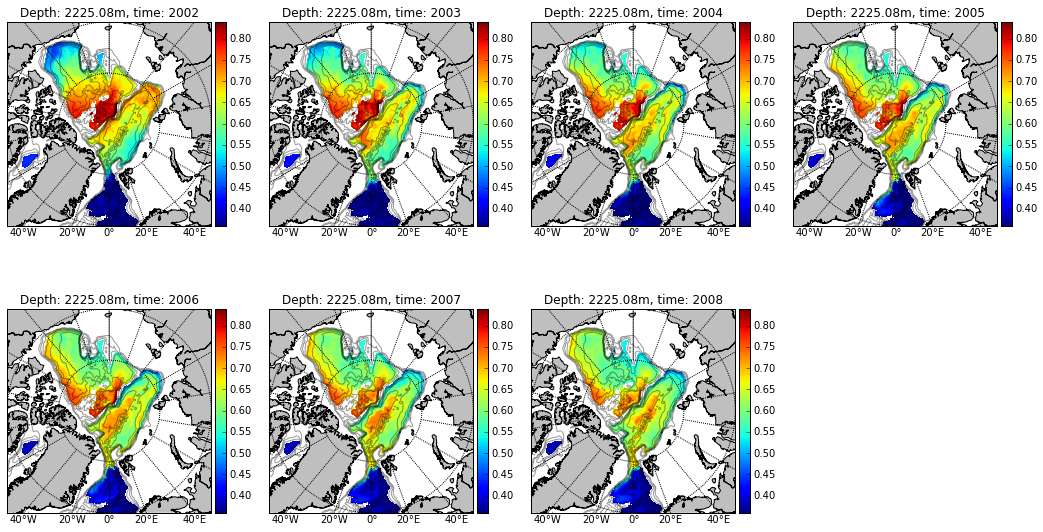

In [21]:
# tracer field at the current time step (TR_8)

layer=40
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_8'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0.36,vmax=0.84);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

* The tracer concentration increases in CB and NB.

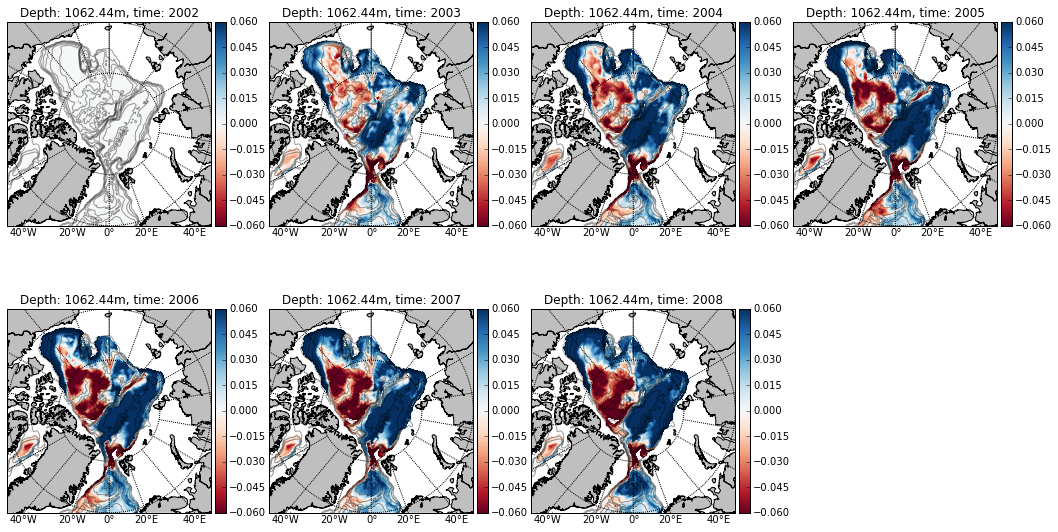

In [22]:
# difference between the current time step and initial time step

layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_8'][time,:,:,:]-ptrc.variables['TR_8'][0,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmin=-0.06,vmax=0.06);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

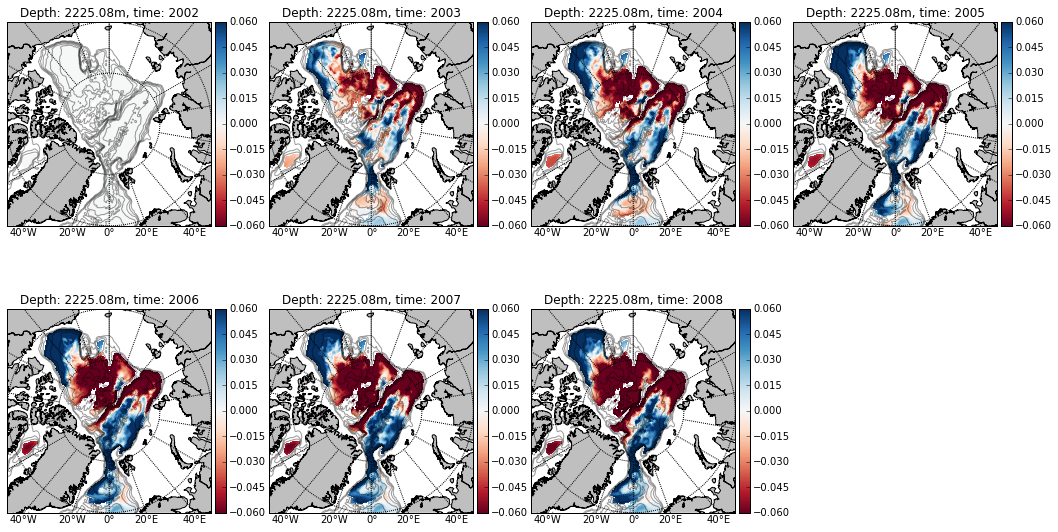

In [23]:
# difference between the current time step and initial time step

layer=40
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_8'][time,:,:,:]-ptrc.variables['TR_8'][0,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmin=-0.06,vmax=0.06);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

(83,)
0
1
2
0
1
2


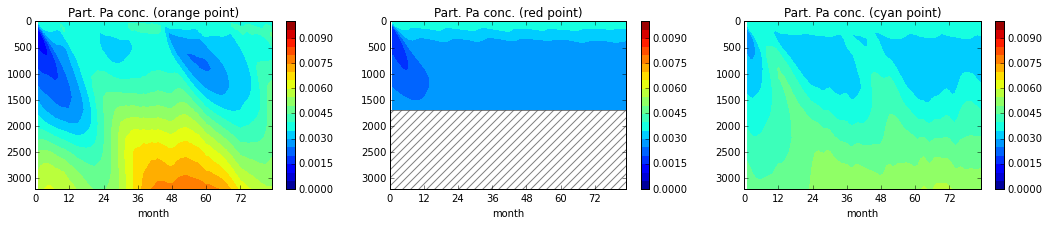

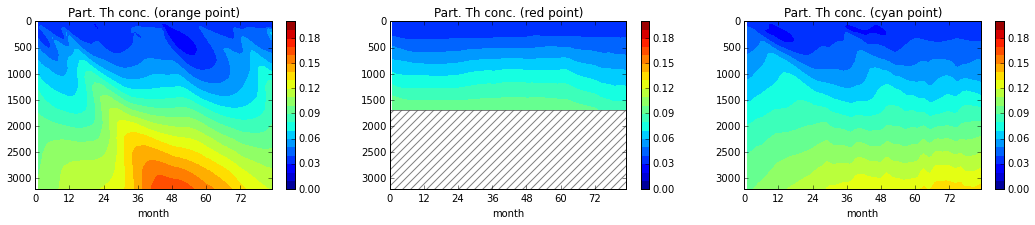

In [34]:
x=np.array([700-400,590-400,560-400])#/2
y=np.array([180,264,340])#/2
c=['orange','red','cyan']

time=np.empty(monthnum)
print time.shape
for i in range (len(time)):
    time[i]=i+1

fig = plt.figure(figsize=(18,3))
for i in range (len(y)):
    print i
    ax = fig.add_subplot(1,3,i+1)
    data=ptrc.variables['TR_9'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0, 0.01, 21))
    plt.colorbar()
    plt.title('Part. Pa conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(1,len(time))
    plt.xlabel('month')
    ax.invert_yaxis()
    plt.xticks(np.arange(0, len(time)+1, 12))

 
    
fig = plt.figure(figsize=(18,3))
for i in range (len(y)):
    ax = fig.add_subplot(1,3,i+1)
    data=ptrc.variables['TR_10'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0,0.2, 21))
    plt.colorbar()
    plt.title('Part. Th conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlabel('month')
    ax.invert_yaxis() 
    plt.xticks(np.arange(0, len(time)+1, 12))

plt.show()

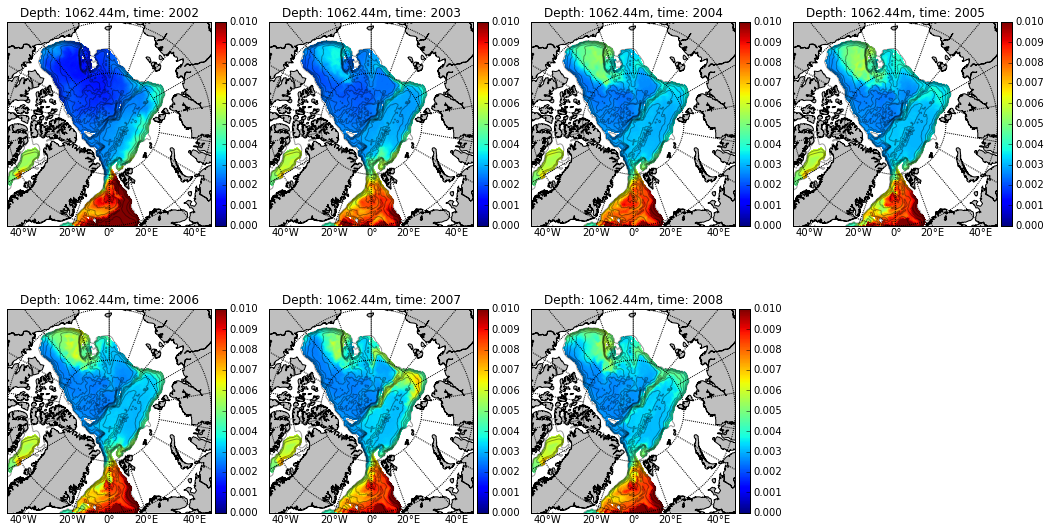

In [37]:
layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_9'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0.00,vmax=0.01);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

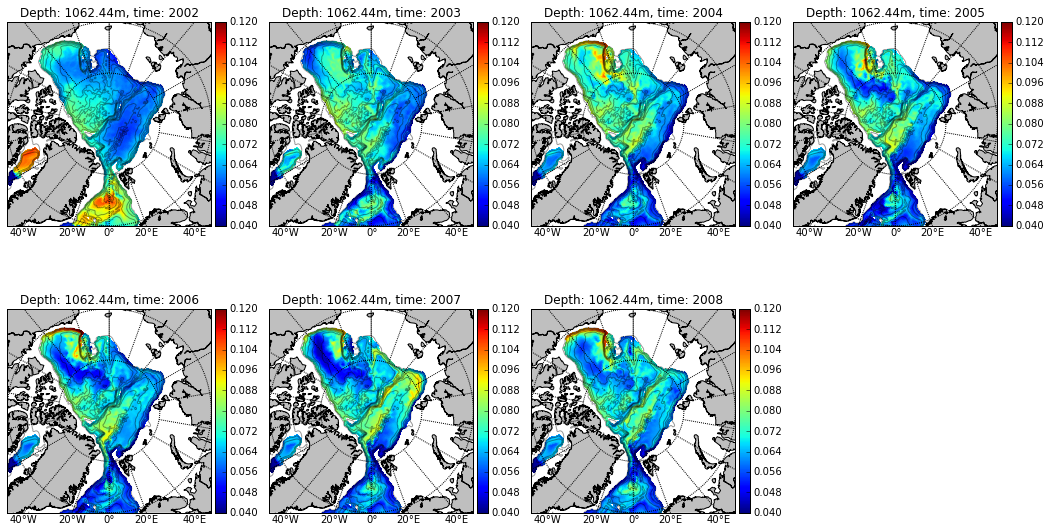

In [26]:
layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_10'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0.04,vmax=0.12);m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

In [27]:
# ice conc. difference between initial field and final field.

(83,)


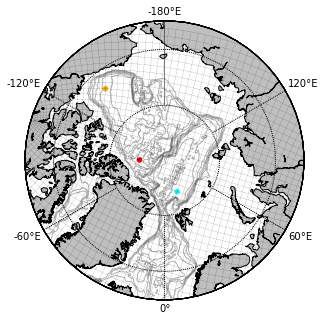

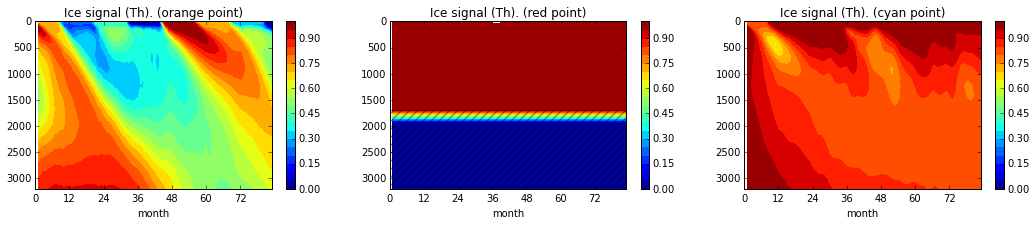

In [28]:
x=np.array([700-400,590-400,560-400])#/2
y=np.array([180,264,340])#/2
c=['orange','red','cyan']


time=np.empty(monthnum)
print time.shape
for i in range (len(time)):
    time[i]=i+1
    
    
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=20)
cs=m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)
#plt.clabel(cs, fontsize=10, inline=1,fmt = '%1.0f')


    
fig = plt.figure(figsize=(18,3))
for i in range (len(y)):
    ax = fig.add_subplot(1,3,i+1)
    
    data=ptrc.variables['TR_12'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],ptrc.variables['TR_12'][:,10:,x[i],y[i]].T,np.linspace(0, 1, 21))
    plt.colorbar()
    plt.title('Ice signal (Th). (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(1,len(time))
    plt.xlabel('month')
    ax.invert_yaxis()
    plt.xticks(np.arange(0, len(time)+1, 12))

 
plt.show()

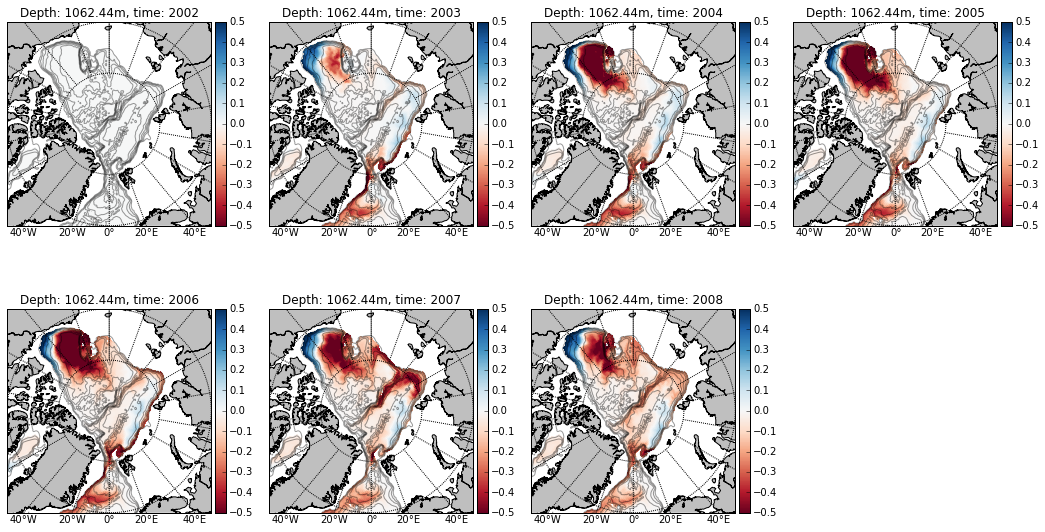

In [29]:
layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_12'][time,:,:,:]-ptrc.variables['TR_12'][0,:,:,:]#-TR_7[time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmax=0.5,vmin=-0.5,cmap='RdBu');m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

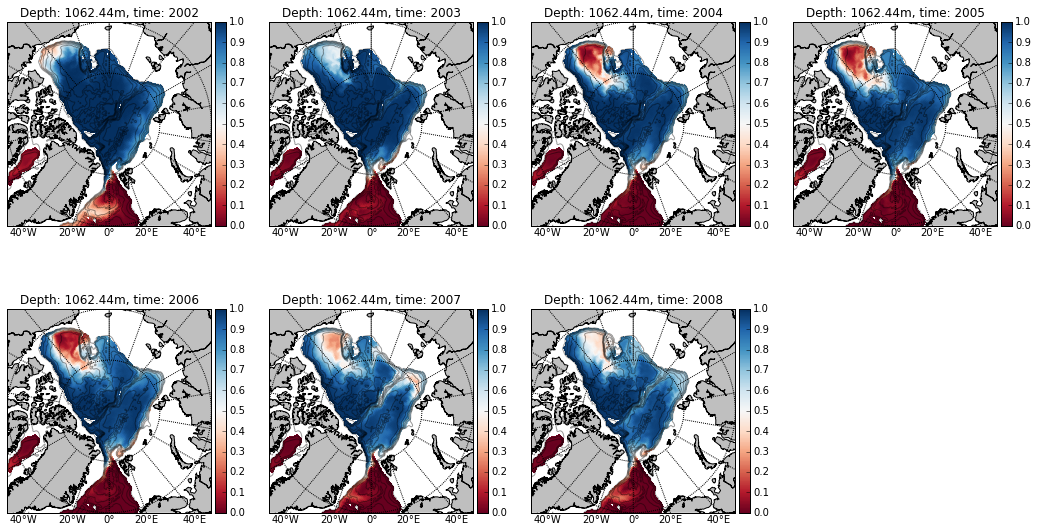

In [30]:
layer=35
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_12'][time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmax=1,vmin=0,cmap='RdBu');m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()

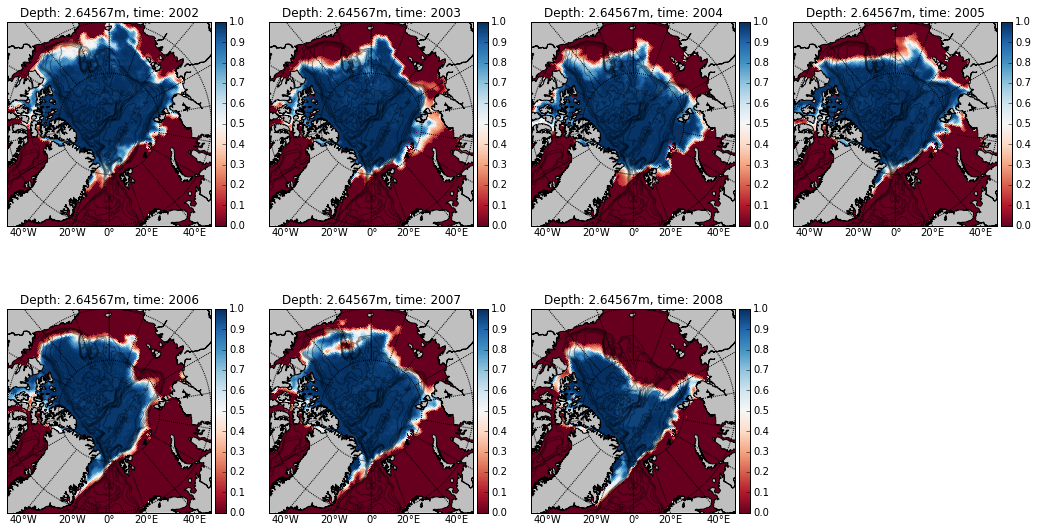

In [31]:
layer=2
k=0

fig = plt.figure(figsize=(18,30))
for i in range (0,monthnum,12):
    time =i
    data =ptrc.variables['TR_12'][time,:,:,:]#-TR_7[time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(6,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=0,vmax=1,cmap='RdBu');m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],2002+i/12))

plt.show()